In [ ]:
from tensorflow.keras import backend as K
K.clear_session()


In [ ]:
from keras.applications.vgg16 import VGG16
model=VGG16(weights='imagenet')
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

100%|██████████| 64.4M/64.4M [00:00<00:00, 90.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4"

# Define train and validation directories
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

# Image Preprocessing (Rescaling & Augmentation)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224,224), batch_size=32, class_mode='binary')


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load VGG16 without the top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze all convolutional layers
base_model.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)  # Regularization
output_layer = Dense(1, activation="sigmoid")(x)  # Binary classification

# ✅ Fix: Ensure the model is built correctly
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Check model summary
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 446s 25s/step - accuracy: 0.5833 - loss: 2.3599 - val_accuracy: 0.7071 - val_loss: 0.7757
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 503s 28s/step - accuracy: 0.6372 - loss: 1.4276 - val_accuracy: 0.7214 - val_loss: 0.6129
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 441s 25s/step - accuracy: 0.7736 - loss: 0.4871 - val_accuracy: 0.7857 - val_loss: 0.4240
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 439s 25s/step - accuracy: 0.7902 - loss: 0.4053 - val_accuracy: 0.7714 - val_loss: 0.4371
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 439s 25s/step - accuracy: 0.8495 - loss: 0.3214 - val_accuracy: 0.7929 - val_loss: 0.4204
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 438s 25s/step - accuracy: 0.8793 - loss: 0.3001 - val_accuracy: 0.7714 - val_loss: 0.4227
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 438s 25s/step - accuracy: 0.8374 - loss: 0.3649 - val_accuracy: 0.7571 - val_loss: 0.4152
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 440s 25s/step - accuracy: 0.8650 - loss: 0.2813 - val_accuracy: 0.

In [ ]:
# Evaluate model on validation data
val_loss, val_acc = model.evaluate(test_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 86s 17s/step - accuracy: 0.7921 - loss: 0.4734
Validation Accuracy: 77.86%


Enter the image path: /content/cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


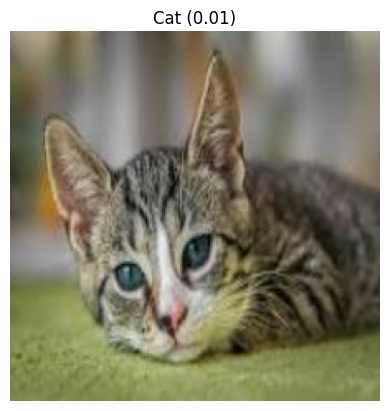

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path, model):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Image not found at '{img_path}'")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224)) / 255.0  # Resize & Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"

    plt.imshow(img[0])
    plt.axis("off")
    plt.title(f"{label} ({prediction:.2f})")
    plt.show()

img_path = input("Enter the image path: ")
predict_image(img_path, model)


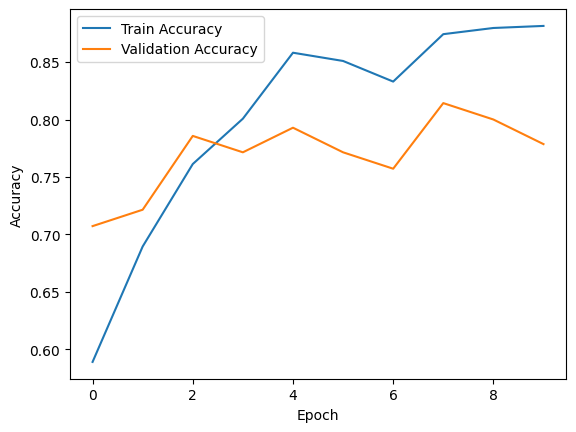

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##AutoEncoders for Image Generation.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3525 - val_loss: 0.1606
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1511 - val_loss: 0.1264
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.1225 - val_loss: 0.1085
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1067 - val_loss: 0.0977
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0967 - val_loss: 0.0902
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0898 - val_loss: 0.0850
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0850 - val_loss: 0.0814
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0816 - val_loss: 0.0790
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0793 - val_loss: 0.0773
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0777 - val_loss: 0.0761
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0769 - val_los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7367 - loss: 0.9903 - val_accuracy: 0.9149 - val_loss: 0.2935
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9173 - loss: 0.2824 - val_accuracy: 0.9339 - val_loss: 0.2231
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9360 - loss: 0.2171 - val_accuracy: 0.9463 - val_loss: 0.1761
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9482 - loss: 0.1759 - val_accuracy: 0.9509 - val_loss: 0.1656
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9550 - loss: 0.1527 - val_accuracy: 0.9555 - val_loss: 0.1451
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9585 - loss: 0.1371 - val_accuracy: 0.9604 - val_loss: 0.1300
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9622 - loss: 0.1264 - val_accuracy: 0.9583 - val_loss: 0.1316
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9655 - loss: 0.1169 - val_accura

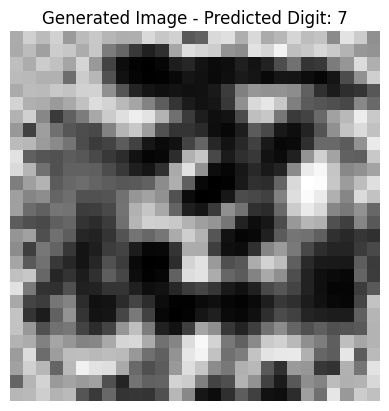

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Flatten the images for the encoder
original_dim = x_train.shape[1] * x_train.shape[2]

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
encoded = Dense(64, activation='relu')(x)

# Decoder
x = Dense(original_dim, activation='sigmoid')(encoded)
decoded = Reshape((28, 28, 1))(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)  # Extract encoder separately

# Decoder model
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-2](encoded_input)
decoder_output = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_output)

# Compile and train autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode training and test images for classifier training
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Define classifier model
num_classes = 10
classifier = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),
    Dense(num_classes, activation='softmax')
])

# Compile and train classifier
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train_encoded, y_train, epochs=10, batch_size=32, validation_data=(x_test_encoded, y_test))

# Generate a random latent vector and decode into an image
random_latent_vector = np.random.normal(size=(1, 64))
generated_image = decoder.predict(random_latent_vector)

# Encode the generated image
generated_image_encoded = encoder.predict(generated_image)

# Predict the digit using the classifier
predicted_digit = np.argmax(classifier.predict(generated_image_encoded))
print(f"Predicted digit for the generated image: {predicted_digit}")

# Display the generated image
plt.imshow(generated_image[0].reshape(28, 28), cmap='gray')
plt.title(f"Generated Image - Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4940 - loss: 0.7345 - val_accuracy: 0.4786 - val_loss: 0.6921
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 523ms/step - accuracy: 0.4811 - loss: 0.6963 - val_accuracy: 0.4929 - val_loss: 0.6920
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 577ms/step - accuracy: 0.5372 - loss: 0.6897 - val_accuracy: 0.5571 - val_loss: 0.6851
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - accuracy: 0.5542 - loss: 0.6867 - val_accuracy: 0.5571 - val_loss: 0.6828
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 556ms/step - accuracy: 0.5265 - loss: 0.6821 - val_accuracy: 0.6286 - val_loss: 0.6793
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 496ms/step - accuracy: 0.5303 - loss: 0.6875 - val_accuracy: 0.5214 - val_loss: 0.6853
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 580ms/step - accuracy: 0.4837 - loss: 0.6947 - val_accuracy: 0.5786 - val_loss: 0.6794
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 582ms/st

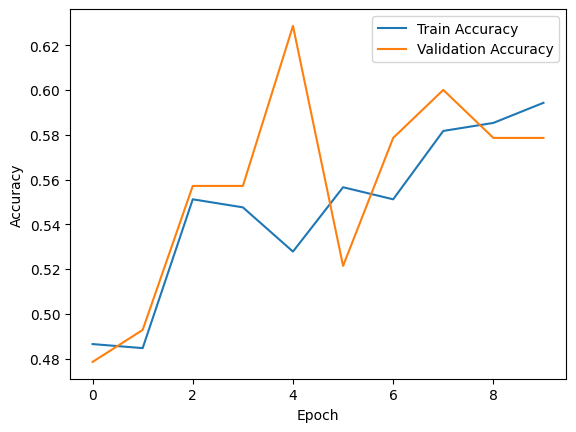

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# Create the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,  # Adjust epochs based on performance
    verbose=1
)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.6343 - loss: 0.6632
Validation Accuracy: 59.29%


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


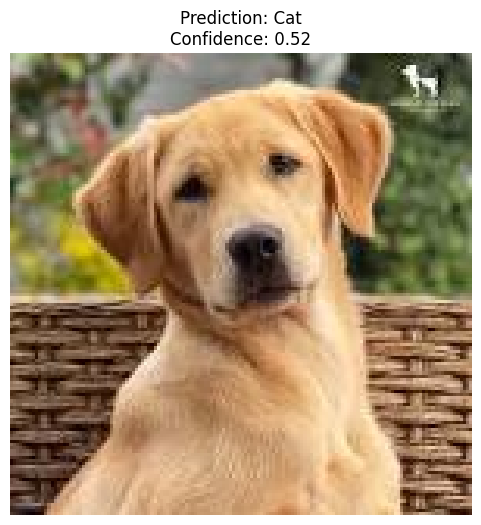

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path, model):
    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Image at '{img_path}' not found!")
        return

    # Convert BGR (OpenCV default) to RGB (for proper display)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize & Normalize
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_array = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict using the model
    prediction = model.predict(img_array)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"Prediction: {label}\nConfidence: {confidence:.2f}")
    plt.show()

# Example Usage
predict_image("/content/dog.jpg", model)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahmoudreda55/satellite-image-classification")

print("Path to dataset files:", path)

100%|██████████| 21.8M/21.8M [00:02<00:00, 11.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mahmoudreda55/satellite-image-classification/versions/1


In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from sklearn.model_selection import train_test_split
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
# Convert grayscale images to RGB and resize to (32, 32)
train_images = [img_to_array(array_to_img(im).convert('RGB').resize((32, 32))) for im in train_images]
test_images = [img_to_array(array_to_img(im).convert('RGB').resize((32, 32))) for im in test_images]
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
# Train the model
model.fit(np.array(train_images), train_labels, epochs=5, batch_size=64, validation_data=(np.array(val_images), val_labels))
model.summary()
test_loss, test_acc = model.evaluate(np.array(test_images),  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
 19/750 ━━━━━━━━━━━━━━━━━━━━ 19:35 2s/step - accuracy: 0.5402 - loss: 1.4339

KeyboardInterrupt: 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0077 - loss: 0.3483 - val_accuracy: 0.0098 - val_loss: 0.1640
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0119 - loss: 0.1538 - val_accuracy: 0.0116 - val_loss: 0.1254
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0110 - loss: 0.1221 - val_accuracy: 0.0108 - val_loss: 0.1076
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0116 - loss: 0.1062 - val_accuracy: 0.0121 - val_loss: 0.0970
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0127 - loss: 0.0962 - val_accuracy: 0.0126 - val_loss: 0.0899
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0123 - loss: 0.0894 - val_accuracy: 0.0125 - val_loss: 0.0850
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0124 - loss: 0.0849 - val_accuracy: 0.0123 - val_loss: 0.0814
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0122 - loss: 0.0817 - val_accuracy: 0

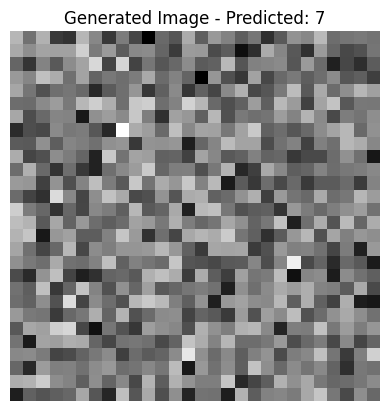

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and flatten data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Encoder
input_img = Input(shape=(28 * 28,))
encoded = Dense(64, activation='relu')(input_img)

# Decoder
decoded = Dense(28 * 28, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)  # Extract the encoder separately
decoder = Sequential([Dense(28 * 28, activation='sigmoid', input_shape=(64,))])

# Compile and train autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))

# Encode training data for classification
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Define a simple classifier
classifier = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),
    Dense(10, activation='softmax')
])

# Compile and train classifier
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train_encoded, y_train, epochs=10, batch_size=32, validation_data=(x_test_encoded, y_test))

# Generate and classify a new image
random_latent_vector = np.random.normal(size=(1, 64))
generated_image = decoder.predict(random_latent_vector)
predicted_digit = np.argmax(classifier.predict(random_latent_vector))

# Display generated image
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.title(f"Generated Image - Predicted: {predicted_digit}")
plt.axis('off')
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3468 - val_loss: 0.1616
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1519 - val_loss: 0.1256
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1217 - val_loss: 0.1075
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1063 - val_loss: 0.0971
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0963 - val_loss: 0.0899
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0896 - val_loss: 0.0850
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0850 - val_loss: 0.0814
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0816 - val_loss: 0.0790
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0794 - val_loss: 0.0775
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0778 - val_loss: 0.0763
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0770 - val_loss: 0.0755
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7535 - loss: 0.8767 - val_accuracy: 0.9197 - val_loss: 0.2782
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9172 - loss: 0.2835 - val_accuracy: 0.9364 - val_loss: 0.2150
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9367 - loss: 0.2119 - val_accuracy: 0.9471 - val_loss: 0.1763
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9484 - loss: 0.1731 - val_accuracy: 0.9496 - val_loss: 0.1653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9551 - loss: 0.1485 - val_accuracy: 0.9520 - val_loss: 0.1568
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9563 - loss: 0.1432 - val_accuracy: 0.9614 - val_loss: 0.1281
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9622 - loss: 0.1222 - val_accuracy: 0.9640 - val_loss: 0.1155
Epoch 

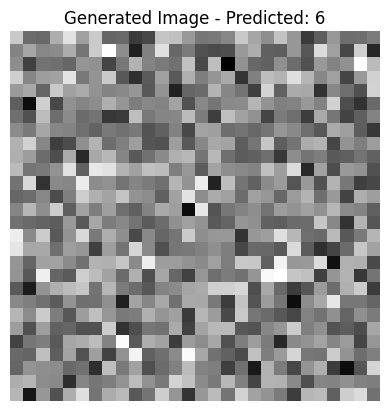

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Encoder
input_img = Input(shape=(28 * 28,))
encoded = Dense(64, activation='relu')(input_img)

# Decoder
decoded = Dense(28 * 28, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
decoder = Sequential([Dense(28 * 28, activation='sigmoid', input_shape=(64,))])

# Train autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))

# Encode training data
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Classifier
classifier = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),
    Dense(10, activation='softmax')
])
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train_encoded, y_train, epochs=10, batch_size=32, validation_data=(x_test_encoded, y_test))

# Generate new image
random_latent_vector = np.random.normal(size=(1, 64))
generated_image = decoder.predict(random_latent_vector)
predicted_digit = np.argmax(classifier.predict(random_latent_vector))

# Display generated image
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.title(f"Generated Image - Predicted: {predicted_digit}")
plt.axis('off')
plt.show()


##SEQ2Seq

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("/content/eng_-french.csv")
data["English words/sentences count"] = data['English words/sentences'].str.split().str.len()
data["French words/sentences count"] = data['French words/sentences'].str.split().str.len()
data = data[(data["English words/sentences count"] <= 6) & (data["French words/sentences count"] <= 6)]
data = data.drop_duplicates()

# Tokenization
eng_tokenizer = Tokenizer()
fre_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(data['English words/sentences'])
fre_tokenizer.fit_on_texts(data['French words/sentences'])

X = eng_tokenizer.texts_to_sequences(data['English words/sentences'])
y = fre_tokenizer.texts_to_sequences(data['French words/sentences'])

# Padding
max_input_length = max(len(seq) for seq in X)
max_output_length = max(len(seq) for seq in y)
X_pad = pad_sequences(X, maxlen=max_input_length, padding='post')
y_pad = pad_sequences(y, maxlen=max_output_length, padding='post')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_pad, test_size=0.2, random_state=42)

# Vocabulary sizes
eng_vocab_size = len(eng_tokenizer.word_index) + 1
fre_vocab_size = len(fre_tokenizer.word_index) + 1

# Encoder
encoder_input = Input(shape=(max_input_length,))
encoder_embedding = Embedding(input_dim=eng_vocab_size, output_dim=256, mask_zero=True)(encoder_input)
encoder_lstm = LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# Decoder
decoder_input = Input(shape=(max_output_length,))
decoder_embedding = Embedding(input_dim=fre_vocab_size, output_dim=256, mask_zero=True)(decoder_input)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

decoder_dense = Dense(fre_vocab_size, activation='softmax')
decoder_final_output = decoder_dense(decoder_outputs)

# Define model
model = Model([encoder_input, decoder_input], decoder_final_output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Prepare decoder input and target
y_train_decoder_input = np.zeros_like(y_train)
y_train_decoder_input[:, 1:] = y_train[:, :-1]
y_train_decoder_input[:, 0] = fre_tokenizer.word_index.get('<start>', 0)

y_test_decoder_input = np.zeros_like(y_test)
y_test_decoder_input[:, 1:] = y_test[:, :-1]
y_test_decoder_input[:, 0] = fre_tokenizer.word_index.get('<start>', 0)

# Train the model
history = model.fit(
    [X_train, y_train_decoder_input],
    np.expand_dims(y_train, -1),
    epochs=5,
    batch_size=64,
    validation_data=([X_test, y_test_decoder_input], np.expand_dims(y_test, -1))
)

# Translation function
def translate(input_sentence):
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])
    input_seq = pad_sequences(input_seq, maxlen=max_input_length, padding='post')

    decoder_input = np.zeros((1, max_output_length))
    decoder_input[0, 0] = fre_tokenizer.word_index.get('<start>', 1)

    translation = []
    for i in range(max_output_length - 1):
        output_tokens = model.predict([input_seq, decoder_input])
        sampled_token_index = np.argmax(output_tokens[0, i, :])
        sampled_word = fre_tokenizer.index_word.get(sampled_token_index, '')

        if sampled_word == '<end>': break
        translation.append(sampled_word)
        decoder_input[0, i + 1] = sampled_token_index

    return ' '.join(translation)

# Test translation
translated_sentence = translate("How are you?")
print(f"Translated: {translated_sentence}")


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 9)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_8             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 9, 256)         │      2,389,760 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 9)              │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 10, 256)        │      4,983,552 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 256), (None,   │        525,312 │ embedding[0][0],       │
│                           │ 256), (None, 256)]     │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 10, 256),      │        525,312 │ embedding_1[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 10, 19467)      │      5,003,019 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 13,426,955 (51.22 MB)

 Trainable params: 13,426,955 (51.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.5446 - loss: 6.0260 - val_accuracy: 0.6082 - val_loss: 4.3859
Epoch 2/5
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 78s 73ms/step - accuracy: 0.6271 - loss: 3.9031 - val_accuracy: 0.6628 - val_loss: 3.3659
Epoch 3/5
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.6798 - loss: 2.8382 - val_accuracy: 0.6936 - val_loss: 2.8627
Epoch 4/5
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.7193 - loss: 2.1471 - val_accuracy: 0.7158 - val_loss: 2.5470
Epoch 5/5
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.7533 - loss: 1.6384 - val_accuracy: 0.7321 - val_loss: 2.3360


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Translated: vous êtes grande       


In [ ]:
def translate(input_sentence):
    # Preprocess the input sentence
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])
    input_seq = pad_sequences(input_seq, maxlen=max_input_length, padding='post')

    # Ensure '<start>' token exists in the French tokenizer
    start_token = fre_tokenizer.word_index.get('<start>', 1)  # Default to 1 if missing
    decoder_input = np.zeros((1, max_output_length))
    decoder_input[0, 0] = start_token

    # Generate translation
    translation = []
    for i in range(max_output_length - 1):  # Iterate one less time
        output_tokens = model.predict([input_seq, decoder_input], verbose=0)  # Avoid TensorFlow warnings

        # Extract the next token index
        sampled_token_index = np.argmax(output_tokens[0, i, :])

        # Retrieve the word (handle missing index case)
        sampled_word = fre_tokenizer.index_word.get(sampled_token_index, '<UNK>')  # Use <UNK> for unknown words

        if sampled_word == '<end>':
            break  # Stop at <end> token

        translation.append(sampled_word)

        # Update decoder input for the next time step
        decoder_input[0, i + 1] = sampled_token_index

    return ' '.join(translation)

# Test the translation function
translated_sentence = translate("Hi.")
print(f"Translated: {translated_sentence}")


Translated: suis en train de mentir <UNK> <UNK> <UNK> <UNK>
